<a href="https://colab.research.google.com/github/vishalsh2109/Data-Poltergeists/blob/main/preprocessing_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing admissions,patients,diagnoses tables from drive
admissions=pd.read_csv('/content/admissions_202208161605.csv')
patients=pd.read_csv('/content/patients_202208161605.csv')
diagnoses=pd.read_csv('/content/diagnoses_icd_202208161605.csv')

In [ ]:
# Create the heart_failure_diagnoses column in the diagnoses table
heart_failure_icd9_codes = [
    '39891', '40201', '40211', '40291', '40401', '40403', '40411', '40413',
    '40491', '40493', '4280', '4281', '42820', '42821', '42822', '42823',
    '42830', '42831', '42832', '42833', '42840', '42841', '42842', '42843',
    '4289'
]

diagnoses['heart_failure_diagnoses'] = diagnoses['icd9_code'].apply(lambda x: 1 if x in heart_failure_icd9_codes else 0)

In [ ]:
diagnoses['heart_failure_diagnoses'].value_counts()

heart_failure_diagnoses
0    629773
1     21274
Name: count, dtype: int64

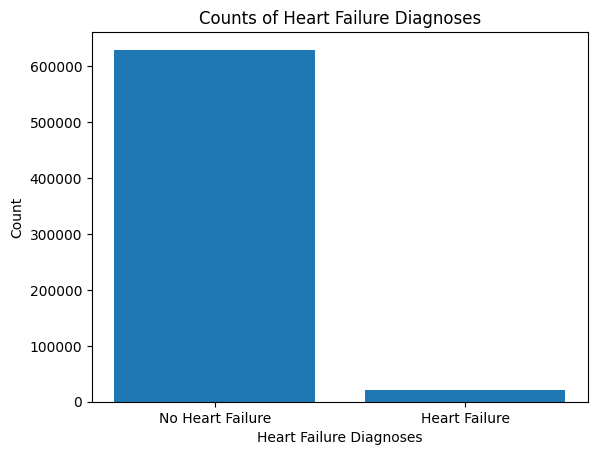

In [ ]:
heart_failure_counts = diagnoses['heart_failure_diagnoses'].value_counts()

# Bar chart using NumPy and matplotlib
labels = heart_failure_counts.index
values = heart_failure_counts.values

plt.bar(labels, values)
plt.xlabel('Heart Failure Diagnoses')
plt.ylabel('Count')
plt.title('Counts of Heart Failure Diagnoses')
plt.xticks(labels, ['No Heart Failure', 'Heart Failure'])
# Customizing x-axis ticks if needed
plt.show()

In [ ]:
#Removing row_id from all the tables
admissions.drop(columns=['row_id'],inplace=True)
diagnoses.drop(columns=['row_id'],inplace=True)
patients.drop(columns=['row_id'],inplace=True)

In [ ]:
data = pd.merge(admissions, diagnoses, on=['hadm_id','subject_id'], how='inner')
data.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,seq_num,icd9_code,heart_failure_diagnoses
0,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,1.0,9678,0
1,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,2.0,9693,0
2,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,3.0,E9502,0
3,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,4.0,E9503,0
4,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,5.0,3488,0


In [ ]:
#Converting admit_time and discharge_time to datetime format
data['admit_time'] = pd.to_datetime(data['admittime'])
data['discharge_time'] = pd.to_datetime(data['dischtime'])

In [ ]:
#Calculating the length of stay
data['length_of_stay'] = (data['discharge_time'] - data['admit_time']).dt.days

In [ ]:
#merging patients table
data = pd.merge(data, patients, on='subject_id', how='inner')
data.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
1,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
2,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
3,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
4,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0


In [ ]:
#Calculating age of the patient
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (data['admit_time'].dt.year - data['dob'].dt.year)

In [ ]:
#After analyszing the data thoroughly some columns were not affecting the heart failure prediction so dropping them
data.drop(columns=['admittime','dischtime','dob','edregtime','edouttime','deathtime','dod','dod_hosp','dod_ssn'],inplace=True)
data.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,...,has_chartevents_data,seq_num,icd9_code,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,expire_flag,age
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,1.0,9678,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
1,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,2.0,9693,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
2,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,3.0,E9502,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
3,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,4.0,E9503,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
4,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,5.0,3488,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65


In [ ]:
data.isnull().sum()

subject_id                      0
hadm_id                         0
admission_type                  0
admission_location              0
discharge_location              0
insurance                       0
language                   202916
religion                     3078
marital_status              68964
ethnicity                       0
diagnosis                      95
hospital_expire_flag            0
has_chartevents_data            0
seq_num                        47
icd9_code                      47
heart_failure_diagnoses         0
admit_time                      0
discharge_time                  0
length_of_stay                  0
gender                          0
expire_flag                     0
age                             0
dtype: int64

In [ ]:
#since language column have more than 30% null values,marital_status, religion column will not affect the model
data.drop(columns=['language','religion','marital_status'],inplace=True)

In [ ]:
data['admission_type'].value_counts()

admission_type
EMERGENCY    517627
ELECTIVE      74397
NEWBORN       45640
URGENT        13383
Name: count, dtype: int64

In [ ]:
data['admission_type'] = data['admission_type'].replace('URGENT', 'EMERGENCY')
data['admission_type'].value_counts()

admission_type
EMERGENCY    531010
ELECTIVE      74397
NEWBORN       45640
Name: count, dtype: int64

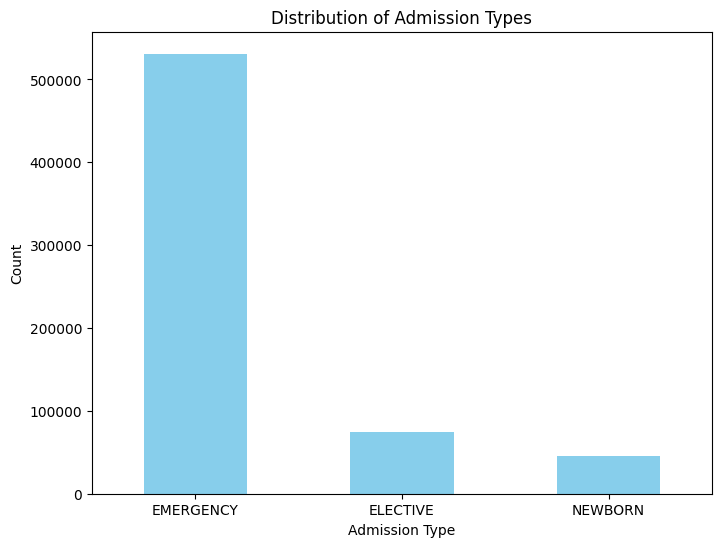

In [ ]:
plt.figure(figsize=(8, 6))
data['admission_type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Distribution of Admission Types')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Handling missing and null values in diagnosis column
data['diagnosis'].fillna('not_specified',inplace=True)
data['diagnosis'].value_counts()

diagnosis
NEWBORN                                   45475
PNEUMONIA                                 23555
SEPSIS                                    18818
CONGESTIVE HEART FAILURE                  13585
ALTERED MENTAL STATUS                     10203
                                          ...  
CLOTTED FISTULA;S/P EMBOLIZATION              1
LOW PLATELETS                                 1
MR\MITRAL VALVE REPAIR REPLACEMENT/SDA        1
LEIOMYO SARCOMA RIGHT LEG/SDA                 1
PANCREATIC DUODENAL ANEURYSM                  1
Name: count, Length: 15692, dtype: int64

In [ ]:
diagnosis_counts = data['diagnosis'].value_counts()
values_to_replace = diagnosis_counts[diagnosis_counts < 1000].index.tolist()
data['diagnosis'] = data['diagnosis'].replace(values_to_replace, 'Others')
data['diagnosis'].value_counts()

diagnosis
Others                       339987
NEWBORN                       45475
PNEUMONIA                     23555
SEPSIS                        18818
CONGESTIVE HEART FAILURE      13585
                              ...  
PLEURAL EFFUSION               1108
RENAL FAILURE                  1088
ASTHMA/COPD EXACERBATION       1038
BRAIN MASS                     1030
ABDOMINAL AORTIC ANEURYSM      1021
Name: count, Length: 76, dtype: int64

In [ ]:
#On analysing the data ,the finding is the seq_num column is not important
data.drop(columns=['seq_num'],inplace=True)

In [ ]:
#Handling missing and null values in icd9_code column
data['icd9_code'] = data['icd9_code'].fillna(data['icd9_code'].mode()[0])
data['icd9_code'].value_counts()

icd9_code
4019     20750
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
74405        1
8786         1
74402        1
2972         1
87264        1
Name: count, Length: 6984, dtype: int64

In [ ]:
data['ethnicity'] = data['ethnicity'].replace(['UNKNOWN/NOT SPECIFIED','OTHER','UNABLE TO OBTAIN'], 'UNKNOWN')
data['ethnicity'].value_counts()

ethnicity
WHITE                                                       463825
UNKNOWN                                                      66683
BLACK/AFRICAN AMERICAN                                       63343
HISPANIC OR LATINO                                           16915
ASIAN                                                        11291
PATIENT DECLINED TO ANSWER                                    5672
HISPANIC/LATINO - PUERTO RICAN                                3216
ASIAN - CHINESE                                               3101
WHITE - RUSSIAN                                               2218
BLACK/CAPE VERDEAN                                            2063
MULTI RACE ETHNICITY                                          1384
BLACK/HAITIAN                                                 1238
ASIAN - ASIAN INDIAN                                          1183
WHITE - OTHER EUROPEAN                                        1024
PORTUGUESE                                          

In [ ]:
ethnicity_counts = data['ethnicity'].value_counts()
values_to_replace = ethnicity_counts[ethnicity_counts < 1000].index.tolist()
data['ethnicity'] = data['ethnicity'].replace(values_to_replace, 'Others')
data['ethnicity'].value_counts()


ethnicity
WHITE                             463825
UNKNOWN                            66683
BLACK/AFRICAN AMERICAN             63343
HISPANIC OR LATINO                 16915
ASIAN                              11291
Others                              7891
PATIENT DECLINED TO ANSWER          5672
HISPANIC/LATINO - PUERTO RICAN      3216
ASIAN - CHINESE                     3101
WHITE - RUSSIAN                     2218
BLACK/CAPE VERDEAN                  2063
MULTI RACE ETHNICITY                1384
BLACK/HAITIAN                       1238
ASIAN - ASIAN INDIAN                1183
WHITE - OTHER EUROPEAN              1024
Name: count, dtype: int64

In [ ]:
data['ethnicity'] = data['ethnicity'].replace(['UNKNOWN'], 'Others')
data['ethnicity'].value_counts()

ethnicity
WHITE                             463825
Others                             74574
BLACK/AFRICAN AMERICAN             63343
HISPANIC OR LATINO                 16915
ASIAN                              11291
PATIENT DECLINED TO ANSWER          5672
HISPANIC/LATINO - PUERTO RICAN      3216
ASIAN - CHINESE                     3101
WHITE - RUSSIAN                     2218
BLACK/CAPE VERDEAN                  2063
MULTI RACE ETHNICITY                1384
BLACK/HAITIAN                       1238
ASIAN - ASIAN INDIAN                1183
WHITE - OTHER EUROPEAN              1024
Name: count, dtype: int64

In [ ]:
data['diagnosis_label'] = data['icd9_code'].apply(
    lambda x: 'heart_failure_diagnosis' if x in heart_failure_icd9_codes else 'non_heart_failure_diagnosis'
)
data.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,icd9_code,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,expire_flag,age,diagnosis_label
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,WHITE,Others,0,1,9678,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
1,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,WHITE,Others,0,1,9693,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
2,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,WHITE,Others,0,1,E9502,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
3,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,WHITE,Others,0,1,E9503,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
4,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,WHITE,Others,0,1,3488,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis


In [ ]:
data.drop(columns=['icd9_code','diagnosis','admission_location','discharge_location','admit_time','discharge_time'],inplace=True)

In [ ]:
data.isnull().sum()

subject_id                 0
hadm_id                    0
admission_type             0
insurance                  0
ethnicity                  0
hospital_expire_flag       0
has_chartevents_data       0
heart_failure_diagnoses    0
length_of_stay             0
gender                     0
expire_flag                0
age                        0
diagnosis_label            0
dtype: int64

In [ ]:
data.head()

,subject_id,hadm_id,admission_type,insurance,ethnicity,hospital_expire_flag,has_chartevents_data,heart_failure_diagnoses,length_of_stay,gender,expire_flag,age,diagnosis_label
0,22,165315,EMERGENCY,Private,WHITE,0,1,0,1,F,0,65,non_heart_failure_diagnosis
1,22,165315,EMERGENCY,Private,WHITE,0,1,0,1,F,0,65,non_heart_failure_diagnosis
2,22,165315,EMERGENCY,Private,WHITE,0,1,0,1,F,0,65,non_heart_failure_diagnosis
3,22,165315,EMERGENCY,Private,WHITE,0,1,0,1,F,0,65,non_heart_failure_diagnosis
4,22,165315,EMERGENCY,Private,WHITE,0,1,0,1,F,0,65,non_heart_failure_diagnosis


In [ ]:
#Removing duplicate rows
data=data.drop_duplicates()


In [ ]:
#Removing unimportant columns
data.drop(columns=['has_chartevents_data','hospital_expire_flag','expire_flag'],inplace=True)
data.head()

<ipython-input-284-29b688c33a17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['has_chartevents_data','hospital_expire_flag','expire_flag'],inplace=True)


,subject_id,hadm_id,admission_type,insurance,ethnicity,heart_failure_diagnoses,length_of_stay,gender,age,diagnosis_label
0,22,165315,EMERGENCY,Private,WHITE,0,1,F,65,non_heart_failure_diagnosis
7,23,152223,ELECTIVE,Medicare,WHITE,0,5,M,71,non_heart_failure_diagnosis
15,23,124321,EMERGENCY,Medicare,WHITE,0,6,M,75,non_heart_failure_diagnosis
25,24,161859,EMERGENCY,Private,WHITE,0,2,M,39,non_heart_failure_diagnosis
29,25,129635,EMERGENCY,Private,WHITE,0,3,M,59,non_heart_failure_diagnosis


In [ ]:
data.drop(columns=['diagnosis_label'],inplace=True)

In [ ]:
data.head()

,subject_id,hadm_id,admission_type,insurance,ethnicity,heart_failure_diagnoses,length_of_stay,gender,age
0,22,165315,EMERGENCY,Private,WHITE,0,1,F,65
7,23,152223,ELECTIVE,Medicare,WHITE,0,5,M,71
15,23,124321,EMERGENCY,Medicare,WHITE,0,6,M,75
25,24,161859,EMERGENCY,Private,WHITE,0,2,M,39
29,25,129635,EMERGENCY,Private,WHITE,0,3,M,59


In [ ]:
#Encoding categorical values
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['admission_type', 'insurance', 'ethnicity', 'gender']
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_columns = encoder.fit_transform(data[columns_to_encode])
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
encoded_data= encoded_data.astype(int)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_data], axis=1)
df_encoded = df_encoded.apply(pd.to_numeric)
df_encoded.head()





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,subject_id,hadm_id,heart_failure_diagnoses,length_of_stay,age,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_NEWBORN,insurance_Government,insurance_Medicaid,...,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_MULTI RACE ETHNICITY,ethnicity_Others,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_WHITE,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN,gender_F,gender_M
0,22.0,165315.0,0.0,1.0,65.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,23.0,152223.0,0.0,5.0,71.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15,23.0,124321.0,0.0,6.0,75.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25,24.0,161859.0,0.0,2.0,39.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,25.0,129635.0,0.0,3.0,59.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
